In this assignment you will continue to make some plots on the Coronavirus Source Data. For plotting you will use Seaborn library. "

"1. Plot a line plot with seaborn for total deaths four the four countries (Spain, France, Germany, Italy) after April 1, 2020.

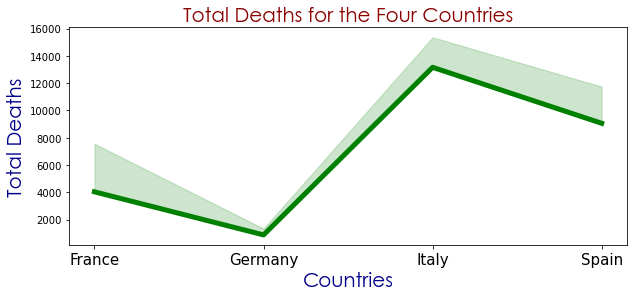

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

corona = pd.read_csv('owid-covid-data.csv', parse_dates=["date"], low_memory=False)
april = pd.to_datetime("2020-04-01")


corona=corona[pd.to_datetime(corona['date']) > april]
locations= pd.DataFrame({'location':['Spain', 'France', 'Germany', 'Italy']})

four_countries=pd.merge(corona, locations, left_on= ['location'], right_on= ['location'],how="inner")
four_countries

title_style = {'family': 'Century Gothic', 'color': 'darkred', 'size': 20 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 20 }

plt.figure(figsize=(10,4))
sns.lineplot(four_countries.location ,four_countries.total_deaths, data = four_countries, lw = 5, color ="green",estimator = 'min')

plt.title('Total Deaths for the Four Countries',fontdict = title_style)
plt.xlabel('Countries', fontdict = axis_style)
plt.ylabel('Total Deaths',fontdict = axis_style)

plt.xticks(rotation = 0, fontsize = 15)


plt.show()





2. Plot a bar plot with seaborn for average death number that compares continents.

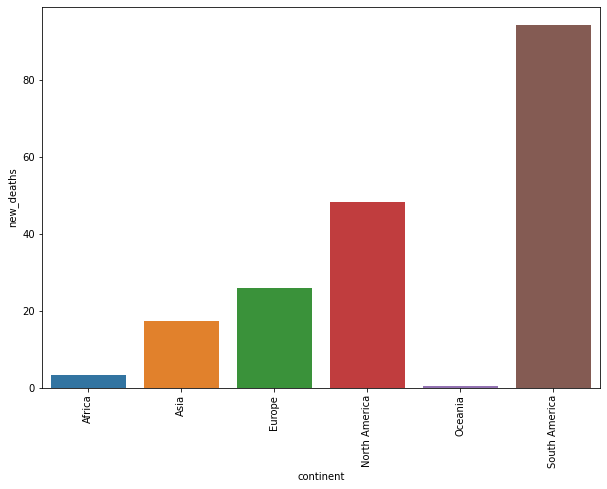

In [17]:
deathNumberMean = corona.groupby(by="continent")["new_deaths"].mean().reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x="continent", y = "new_deaths", data=deathNumberMean)
plt.xticks(rotation = 90)
plt.show()



3. Plot a histogram for daily deaths for any country you choose. Make four subplots for different bin counts and `kde` arguments.

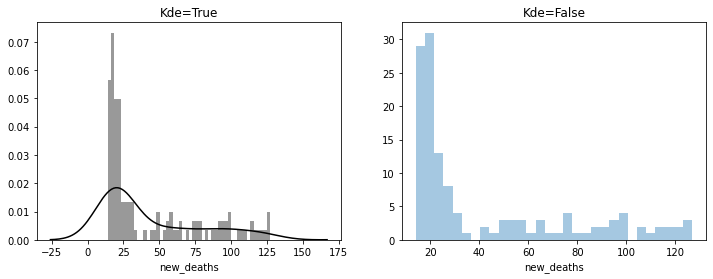

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)

for city in ["Turkey"]:
    sns.distplot(corona[corona.location == city].new_deaths,bins=50,color="black")
plt.title("Kde=True")

plt.subplot(1,2,2)

for city in ["Turkey"]:
    sns.distplot(corona[corona.location == city].new_deaths,kde=False ,bins=30)
plt.title("Kde=False")

plt.show()

4. Create a figure and three subplots containing boxplot, violin plot and swarm plot for daily deaths of two countries you choose

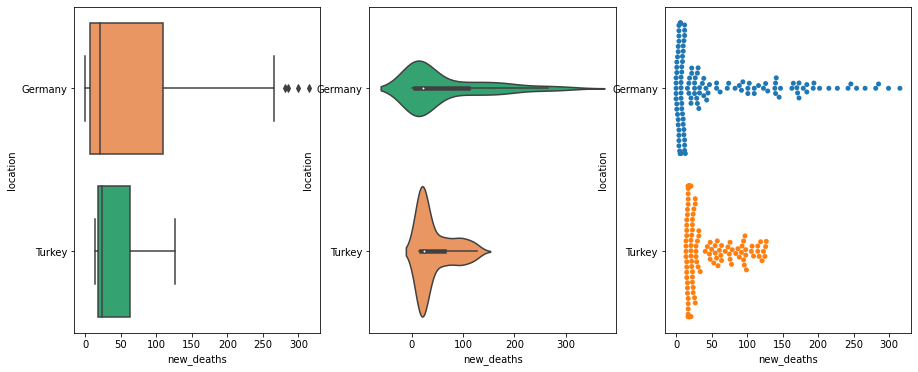

In [69]:
plt.figure(figsize=(15, 6))

locations= pd.DataFrame({'location':[ 'Turkey', 'Germany']})

two_countries=pd.merge(corona, locations, left_on= ['location'], right_on= ['location'],how="inner")
merge

plt.subplot(131)
sns.boxplot(x="new_deaths", y="location",data=two_countries,palette = ['#FF914D', '#22B573'])

plt.subplot(132)
sns.violinplot(x = 'new_deaths',  y = 'location', data = two_countries, palette = ['#22B573', '#FF914D'])

plt.subplot(133)
sns.swarmplot(x="new_deaths", y="location", data=two_countries)

plt.show()


